Data scraping and understanding 

In [26]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

In [5]:


# hemin du WebDriver 
webdriver_path = r"C:\Users\NOURA\Downloads\chromedriver-win64\chromedriver.exe"

# Configuration de Selenium
chrome_options = Options()
chrome_options.add_argument("--headless")  # Mode sans interface graphique
chrome_options.add_argument("--disable-gpu")  # Désactiver le GPU pour éviter certains bugs
chrome_options.add_argument("--no-sandbox")  # Évite certains problèmes de permission
chrome_options.add_argument("--disable-dev-shm-usage")  # Réduit l'utilisation de la mémoire partagée
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36")

# Démarrer WebDriver
service = Service(webdriver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)

try:
    #Accéder à la page
    url = "https://cryptorank.io/all-coins-list"
    driver.get(url)

    # Attendre que le tableau apparaisse
    try:
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "table")))
        print(" Tableau trouvé !")
    except:
        print("Erreur : Tableau non trouvé.")
        exit()

    # Trouver toutes les lignes du tableau
    rows = driver.find_elements(By.XPATH, "//table//tbody//tr")

    # extraction des données
    data = []
    for row in rows:
        columns = row.find_elements(By.TAG_NAME, "td")
        if len(columns) > 6:  # Vérifier qu'il y a bien toutes les colonnes nécessaires
            data.append([
                columns[1].text.strip(),  # Nom
                columns[2].text.strip(),  # Prix
                columns[3].text.strip(),  # Changement 24h
                columns[4].text.strip(),  # Market Cap
                columns[5].text.strip(),  # Volume 24h
                columns[6].text.strip()   # Supply
            ])

    # Conversion en DataFrame
    df = pd.DataFrame(data, columns=["Nom", "Prix", "Changement 24h", "Market Cap", "Volume 24h", "Supply"])

    # Afficher le DataFrame
    print(df)

    # Sauvegarde des données (optionnel)
    df.to_csv("crypto_data.csv", index=False, encoding="utf-8")
    print("Données sauvegardées dans 'crypto_data.csv'.")

except Exception as e:
    print(f" Erreur : {e}")

finally:
    # Fermer le driver proprement
    driver.quit()
    print(" WebDriver fermé.")


 Tableau trouvé !
   Nom               Prix Changement 24h Market Cap Volume 24h     Supply
0    1       Bitcoin\nBTC       $ 94,945        N/A    $ 1.88T   $ 16.49B
1    2      Ethereum\nETH        $ 2,654        N/A  $ 319.32B   $ 10.05B
2    3           XRP\nXRP         $ 2.54        N/A  $ 146.25B    $ 3.16B
3    4       Tether\nUSDT        $ 0.999        N/A  $ 141.69B   $ 41.76B
4    5           BNB\nBNB       $ 643.27        N/A   $ 93.77B  $ 699.32M
..  ..                ...            ...        ...        ...        ...
95      PancakeSwap\nCAKE         $ 2.52                                 
96      Tether Gold\nXAUT        $ 2,928                                 
97             Kaia\nKAIA        $ 0.122                                 
98          Onyxcoin\nXCN        $ 0.021                                 
99      PayPal USD\nPYUSD         $ 1.00                                 

[100 rows x 6 columns]
Données sauvegardées dans 'crypto_data.csv'.
 WebDriver fermé.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:


#  Charger les données
df = pd.read_csv("crypto_data.csv")

#  Aperçu général des données
print(" Aperçu des premières lignes :")
print(df.head())

print("\n Informations sur les données :")
print(df.info())




 Aperçu des premières lignes :
   Nom           Prix Changement 24h  Market Cap Volume 24h     Supply
0  1.0   Bitcoin\nBTC       $ 94,945         NaN    $ 1.88T   $ 16.49B
1  2.0  Ethereum\nETH        $ 2,654         NaN  $ 319.32B   $ 10.05B
2  3.0       XRP\nXRP         $ 2.54         NaN  $ 146.25B    $ 3.16B
3  4.0   Tether\nUSDT        $ 0.999         NaN  $ 141.69B   $ 41.76B
4  5.0       BNB\nBNB       $ 643.27         NaN   $ 93.77B  $ 699.32M

 Informations sur les données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nom             10 non-null     float64
 1   Prix            100 non-null    object 
 2   Changement 24h  100 non-null    object 
 3   Market Cap      0 non-null      float64
 4   Volume 24h      10 non-null     object 
 5   Supply          10 non-null     object 
dtypes: float64(2), object(4)
memory usage: 4.8

In [13]:
df.head()

,Nom,Prix,Changement 24h,Market Cap,Volume 24h,Supply
0,1.0,Bitcoin\nBTC,"$ 94,945",NaN,$ 1.88T,$ 16.49B
1,2.0,Ethereum\nETH,"$ 2,654",NaN,$ 319.32B,$ 10.05B
2,3.0,XRP\nXRP,$ 2.54,NaN,$ 146.25B,$ 3.16B
3,4.0,Tether\nUSDT,$ 0.999,NaN,$ 141.69B,$ 41.76B
4,5.0,BNB\nBNB,$ 643.27,NaN,$ 93.77B,$ 699.32M


In [15]:
df.shape 

(100, 6)

In [17]:
df.dtypes

Nom               float64
Prix               object
Changement 24h     object
Market Cap        float64
Volume 24h         object
Supply             object
dtype: object

In [19]:
#Identifier les nbres manquantes(NaN)
df.isna().sum()

Nom                90
Prix                0
Changement 24h      0
Market Cap        100
Volume 24h         90
Supply             90
dtype: int64

In [21]:
df.describe()

,Nom,Market Cap
count,10.00000,0.0
mean,5.50000,NaN
std,3.02765,NaN
min,1.00000,NaN
25%,3.25000,NaN
50%,5.50000,NaN
75%,7.75000,NaN
max,10.00000,NaN


count → Nombre de valeurs non nulles (10 pour "Nom", 0 pour "Market Cap").
mean → Moyenne des valeurs de la colonne "Nom" (5.5).
std → Écart-type (3.02765), mesure de dispersion des valeurs.
min → Valeur minimale de la colonne "Nom" (1).
25%, 50%, 75% → Quartiles (médailles de classement des valeurs).
max → Valeur maximale de la colonne "Nom" (10).
 "Market Cap" est NaN  il ya des valeurs sont manquantes (NaN).
et  c'est une colonne texte (ex: "$1,000,000,000"), et df.describe() ignore les chaînes de caractères.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nom             10 non-null     float64
 1   Prix            100 non-null    object 
 2   Changement 24h  100 non-null    object 
 3   Market Cap      0 non-null      float64
 4   Volume 24h      10 non-null     object 
 5   Supply          10 non-null     object 
dtypes: float64(2), object(4)
memory usage: 4.8+ KB


In [29]:
print(df.isnull().sum())


Nom                90
Prix                0
Changement 24h      0
Market Cap        100
Volume 24h         90
Supply             90
dtype: int64


In [31]:
#Nettoyage des données
# Supprimer les lignes où il manque des valeurs
df = df.dropna()

In [33]:
# Conversion des colonnes numériques
def convert_price(value):
    try:
        return float(value.replace("$", "").replace(",", ""))
    except:
        return None

df["Prix"] = df["Prix"].apply(convert_price)
df["Market Cap"] = df["Market Cap"].apply(convert_price)
df["Volume 24h"] = df["Volume 24h"].apply(convert_price)

# Convertir la variation 24h en pourcentage
df["Changement 24h"] = df["Changement 24h"].str.replace("%", "").astype(float)

print("\n Données nettoyées !")




 Données nettoyées !


In [41]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Fonction pour récupérer les données de prix historiques
def get_crypto_prices(crypto_id="bitcoin", days=30, currency="usd"):
    url = f"https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart"
    params = {
        "vs_currency": currency,
        "days": days,
        "interval": "daily"
    }
    response = requests.get(url, params=params)
    data = response.json()
    
    # Convertir en DataFrame
    prices = data["prices"]
    df = pd.DataFrame(prices, columns=["timestamp", "price"])
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")  # Convertir en date
    return df

# Récupérer les prix de Bitcoin sur 30 jours
df = get_crypto_prices("bitcoin", 30)



In [45]:
# Afficher les premières lignes
df.head

<bound method NDFrame.head of              timestamp          price
0  2025-01-21 00:00:00  101764.908602
1  2025-01-22 00:00:00  106182.236820
2  2025-01-23 00:00:00  103673.535095
3  2025-01-24 00:00:00  104067.609912
4  2025-01-25 00:00:00  104835.192536
5  2025-01-26 00:00:00  104796.040777
6  2025-01-27 00:00:00  102552.248743
7  2025-01-28 00:00:00  101958.469537
8  2025-01-29 00:00:00  101313.112645
9  2025-01-30 00:00:00  103718.979398
10 2025-01-31 00:00:00  104781.513510
11 2025-02-01 00:00:00  102382.394097
12 2025-02-02 00:00:00  100674.787625
13 2025-02-03 00:00:00   97568.316530
14 2025-02-04 00:00:00  101466.860666
15 2025-02-05 00:00:00   98118.439217
16 2025-02-06 00:00:00   96582.886829
17 2025-02-07 00:00:00   96635.418753
18 2025-02-08 00:00:00   96558.456310
19 2025-02-09 00:00:00   96558.237625
20 2025-02-10 00:00:00   96548.578654
21 2025-02-11 00:00:00   97399.981614
22 2025-02-12 00:00:00   95739.977371
23 2025-02-13 00:00:00   97836.188561
24 2025-02-14 00:00:

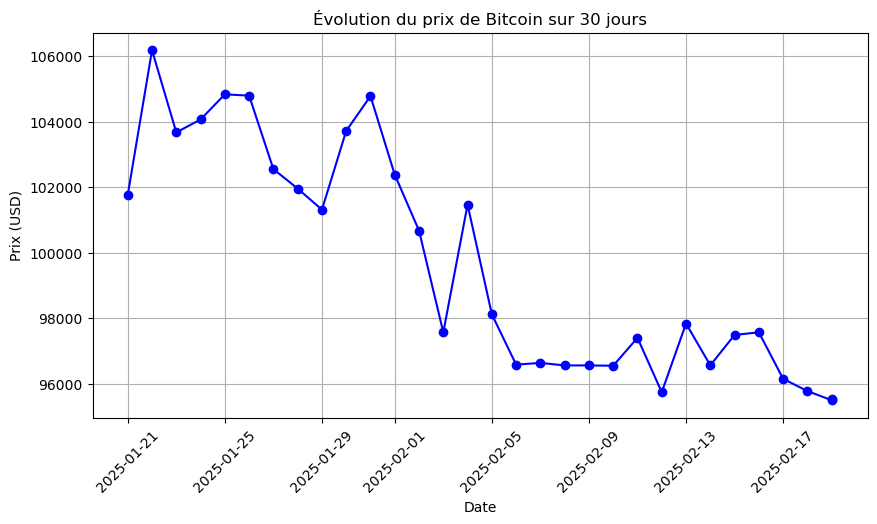

In [43]:
# Afficher les premières lignes
df.head

# Tracer l'évolution du prix
plt.figure(figsize=(10,5))
plt.plot(df["timestamp"], df["price"], marker="o", linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("Prix (USD)")
plt.title("Évolution du prix de Bitcoin sur 30 jours")
plt.grid()
plt.xticks(rotation=45)
plt.show()



   timestamp          price
0 2025-01-21  101764.908602
1 2025-01-22  106182.236820
2 2025-01-23  103673.535095
3 2025-01-24  104067.609912
4 2025-01-25  104835.192536


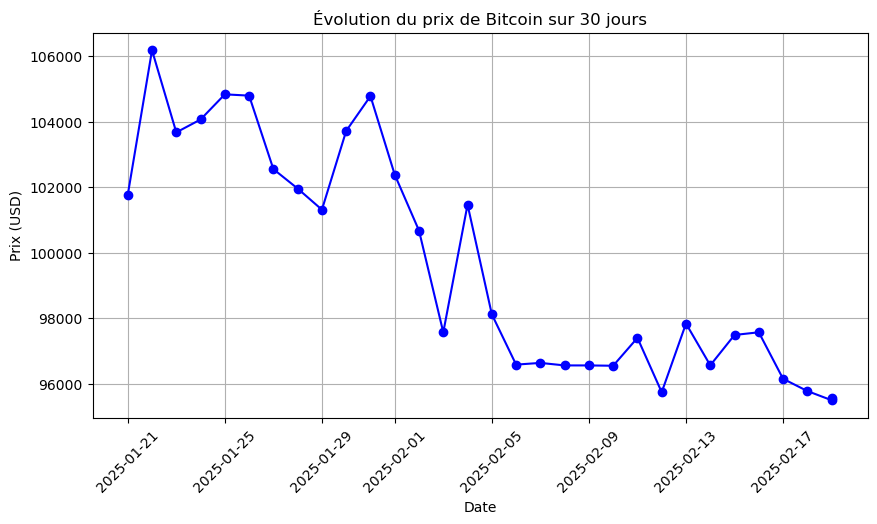

In [51]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Fonction pour récupérer les données de prix historiques
def get_crypto_prices(crypto_id="bitcoin", days=30, currency="usd"):
    url = f"https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart"
    params = {
        "vs_currency": currency,
        "days": days,
        "interval": "daily"
    }
    response = requests.get(url, params=params)
    data = response.json()
    
    # Convertir en DataFrame
    prices = data["prices"]
    df = pd.DataFrame(prices, columns=["timestamp", "price"])
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")  # Convertir en date
    return df

# Récupérer les prix de Bitcoin sur 30 jours
df = get_crypto_prices("bitcoin", 30)

# Afficher les premières lignes
print(df.head())

# Tracer l'évolution du prix
plt.figure(figsize=(10,5))
plt.plot(df["timestamp"], df["price"], marker="o", linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("Prix (USD)")
plt.title("Évolution du prix de Bitcoin sur 30 jours")
plt.grid()
plt.xticks(rotation=45)
plt.show()
